In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Function to load Fashion MNIST dataset from binary files

In [2]:
# Function to load Fashion MNIST dataset from binary files

def load_data():
    # Get the absolute path to the data directory relative to the notebooks folder
    data_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'data'))
    
    # Load the data from the specified directory
    train_images = np.fromfile(os.path.join(data_dir, 'train-images-idx3-ubyte'), dtype=np.uint8)[16:].reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
    train_labels = np.fromfile(os.path.join(data_dir, 'train-labels-idx1-ubyte'), dtype=np.uint8)[8:].astype(np.int64)
    test_images = np.fromfile(os.path.join(data_dir, 't10k-images-idx3-ubyte'), dtype=np.uint8)[16:].reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
    test_labels = np.fromfile(os.path.join(data_dir, 't10k-labels-idx1-ubyte'), dtype=np.uint8)[8:].astype(np.int64)

    return (train_images, train_labels), (test_images, test_labels)




# Function to preprocess the data

In [3]:
# Function to preprocess the data
def preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = load_data()

    # Convert the labels into one-hot vectors
    train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
    test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

    return (train_images, train_labels), (test_images, test_labels)



In [4]:
# Function to create the model

In [5]:
# Function to create the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


# Function to compile the model

In [6]:
# Function to compile the model
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



# Function to train the model

In [7]:
# Function to train the model
def train_model(model, train_images, train_labels, test_images, test_labels, epochs=10):
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return history



# Function to plot accuracy and loss curves

In [8]:
# Function to plot accuracy and loss curves
def plot_curves(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()


# Function to display sample images with their predicted and actual labels

In [9]:
# Function to display sample images with their predicted and actual labels
def display_sample_images(model, test_images, test_labels):
    predictions = model.predict(test_images)
    sample_images = test_images[:5]
    sample_labels = test_labels[:5]
    sample_predictions = predictions[:5]

    for i in range(len(sample_images)):
        plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Actual: {np.argmax(sample_labels[i])}, Predicted: {np.argmax(sample_predictions[i])}")
        plt.show()


# Main function

C:\Users\amamj.RAPTOR\anaconda3\envs\SIMULATION\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.7315 - loss: 0.7296 - val_accuracy: 0.8703 - val_loss: 0.3680
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.8750 - loss: 0.3442 - val_accuracy: 0.8922 - val_loss: 0.3081
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8942 - loss: 0.2824 - val_accuracy: 0.8969 - val_loss: 0.2917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - accuracy: 0.9072 - loss: 0.2513 - val_accuracy: 0.8921 - val_loss: 0.2871
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9190 - loss: 0.2202 - val_accuracy: 0.9080 - val_loss: 0.2560
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9243 - loss: 0.2022 - val_accuracy: 0.9080 - val_loss: 0.2520
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9330 - loss: 0.1773 - val_accuracy: 0.9054 - val_loss: 0.2769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9375 -

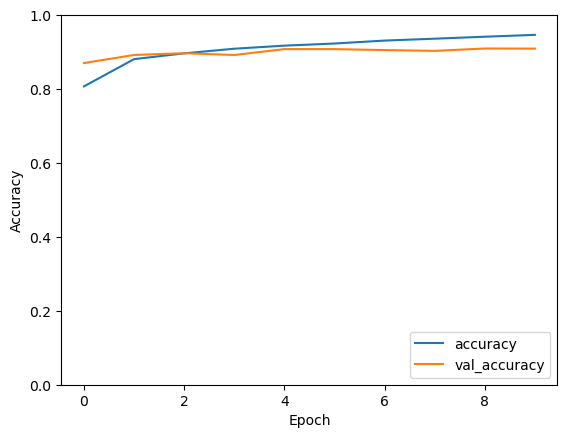

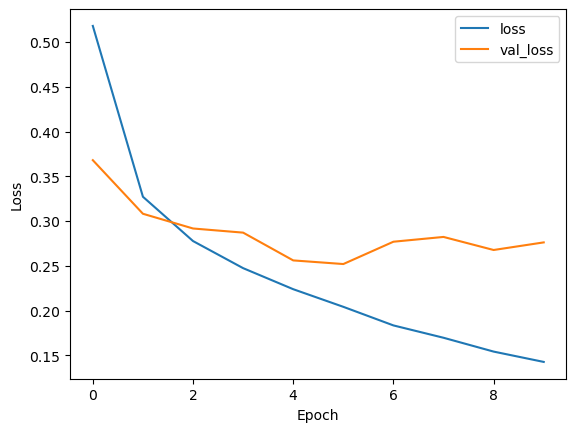

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


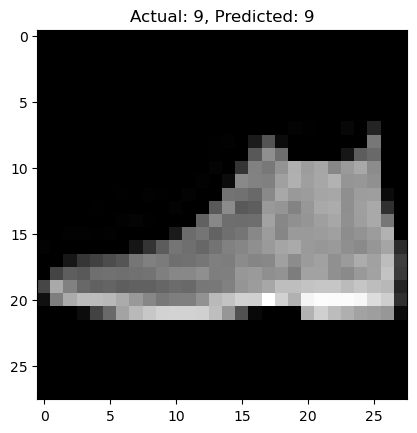

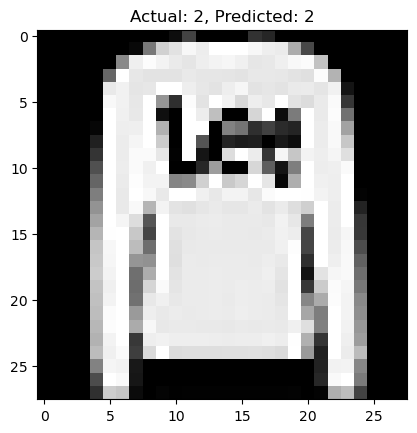

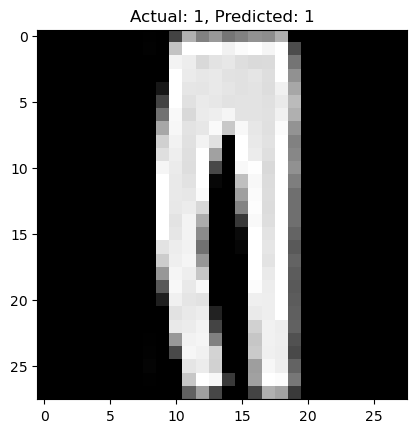

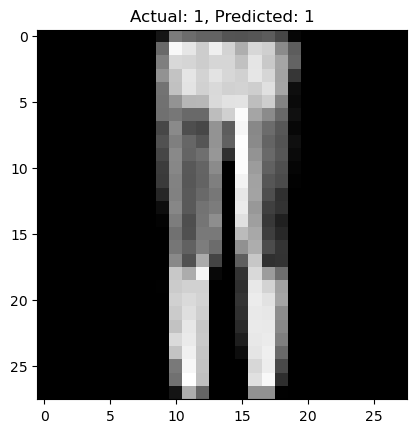

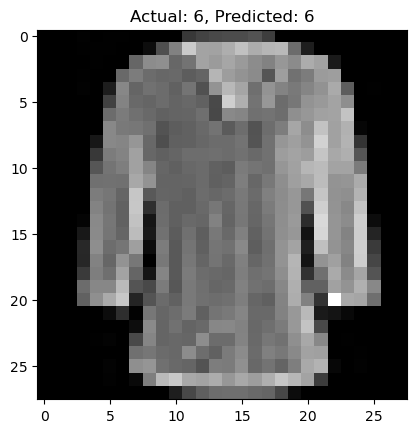

In [10]:
if __name__ == "__main__":
    # Preprocess the data
    (train_images, train_labels), (test_images, test_labels) = preprocess_data()

    # Create the model
    model = create_model()

    # Compile the model
    model = compile_model(model)

    # Train the model
    history = train_model(model, train_images, train_labels, test_images, test_labels)

    # Plot accuracy and loss curves
    plot_curves(history)

    # Display sample images with their predicted and actual labels
    display_sample_images(model, test_images, test_labels)
